/var/folders/py/r18r2psx509b19yt58bj8b300000gn/T/ipykernel_17624/234696142.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Signal'][short_window:] = np.where(df['Short_MA'][short_window:] > df['Long_MA'][short_window:], 1, 0)
/var/f

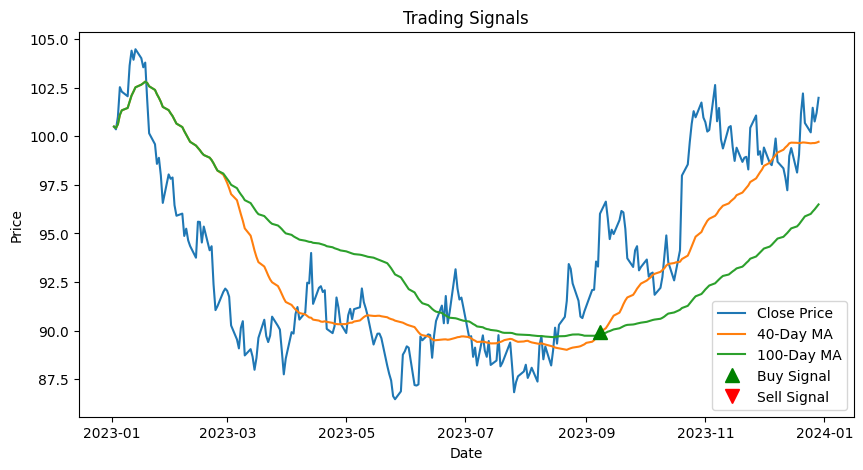

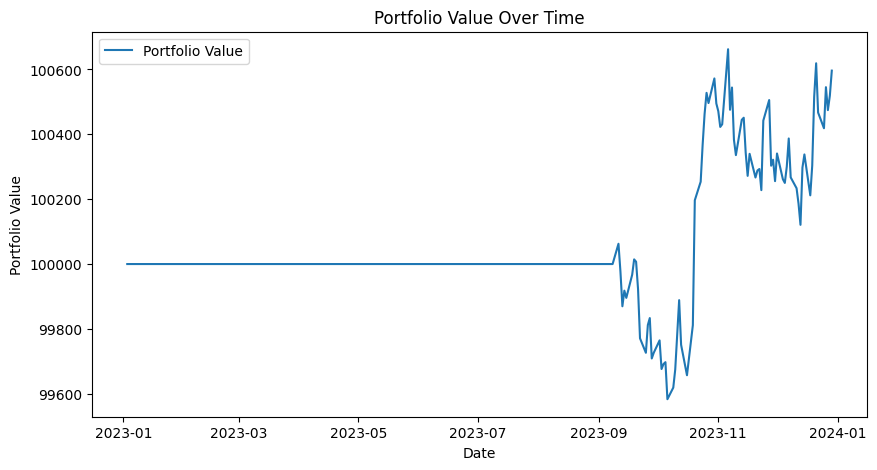

Cumulative Returns: 0.01
Annualized Return: 0.01
Annualized Volatility: 0.01
Sharpe Ratio: -0.47


/var/folders/py/r18r2psx509b19yt58bj8b300000gn/T/ipykernel_17624/234696142.py:66: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_returns = df['Total'][-1] / initial_capital - 1


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set the seed for reproducibility
np.random.seed(42)

# Generate random stock price data
date_range = pd.date_range(start='2023-01-01', end='2023-12-31', freq='B')  # Business days
n = len(date_range)
price = 100 + np.cumsum(np.random.normal(0, 1, n))  # Random walk around 100

# Create a DataFrame
df = pd.DataFrame(data={'Date': date_range, 'Close': price})
df.set_index('Date', inplace=True)

# Calculate moving averages
short_window = 40
long_window = 100

df['Short_MA'] = df['Close'].rolling(window=short_window, min_periods=1).mean()
df['Long_MA'] = df['Close'].rolling(window=long_window, min_periods=1).mean()

# Generate trading signals
df['Signal'] = 0  # Default to no position
df['Signal'][short_window:] = np.where(df['Short_MA'][short_window:] > df['Long_MA'][short_window:], 1, 0)
df['Position'] = df['Signal'].diff()

# Backtest the strategy
initial_capital = 100000.0
shares = 100  # Number of shares per trade

df['Portfolio Value'] = initial_capital
df['Holdings'] = df['Signal'] * shares * df['Close']
df['Cash'] = initial_capital - (df['Position'] * shares * df['Close']).cumsum()
df['Total'] = df['Holdings'] + df['Cash']
df['Returns'] = df['Total'].pct_change()

# Plot the signals on the stock price data
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['Short_MA'], label='40-Day MA')
plt.plot(df['Long_MA'], label='100-Day MA')

# Plot buy signals
plt.plot(df[df['Position'] == 1].index, df['Short_MA'][df['Position'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')
# Plot sell signals
plt.plot(df[df['Position'] == -1].index, df['Short_MA'][df['Position'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.title('Trading Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot portfolio value over time
plt.figure(figsize=(10, 5))
plt.plot(df['Total'], label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()

# Calculate performance metrics
cumulative_returns = df['Total'][-1] / initial_capital - 1
annualized_return = ((1 + cumulative_returns) ** (252 / n)) - 1
annualized_volatility = df['Returns'].std() * np.sqrt(252)

print(f"Cumulative Returns: {cumulative_returns:.2f}")
print(f"Annualized Return: {annualized_return:.2f}")
print(f"Annualized Volatility: {annualized_volatility:.2f}")

# Sharpe Ratio
risk_free_rate = 0.01
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")


In [2]:
import numpy as np

# Generate random stock price data
np.random.seed(42)
price = np.random.rand(100) * 100  # Random prices between 0 and 100

# Initialize variables
capital = 10000  # Initial capital
shares = 0  # Number of shares held
position = None  # Current position (None: out of market, 'buy': buy, 'sell': sell)

# Trading algorithm
for i in range(len(price)):
    if position is None:
        # Determine whether to buy or sell
        if price[i] < np.mean(price[:i]):
            position = 'buy'
            shares = capital / price[i]
            capital = 0
        else:
            position = 'sell'
            capital = shares * price[i]
            shares = 0
    elif position == 'buy':
        # Determine whether to sell
        if price[i] > np.mean(price[:i]):
            position = 'sell'
            capital = shares * price[i]
            shares = 0
    elif position == 'sell':
        # Determine whether to buy
        if price[i] < np.mean(price[:i]):
            position = 'buy'
            shares = capital / price[i]
            capital = 0

# Print final capital and shares
print("Final Capital:", capital)
print("Final Shares:", shares)

Final Capital: 0
Final Shares: 0.0


/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [3]:
#QIANQIAN

duhfudhfudhf

NameError: name 'duhfudhfudhf' is not defined

In [ ]:
import yfinance as yf
import pandas as pd

# Fetch daily S&P 500 data
sp500_data = yf.download('^GSPC', start='2000-01-01', end='2024-01-01')
sp500_data['daily_return'] = sp500_data['Close'].pct_change() #might need
sp500_data['ma_200'] = sp500_data['Close'].rolling(window=200).mean() # for long term
sp500 = sp500_data.dropna()
import pandas_datareader.data as pdr
import yfinance as yf
import pandas as pd

# Fetch economic indicators from FRED
gdp = pdr.get_data_fred('GDP', start='2000-01-01', end='2024-01-01') #quaterly

inflation = pdr.get_data_fred('CPIAUCSL', start='2000-01-01', end='2024-01-01')  # CPI for inflation
unemployment = pdr.get_data_fred('UNRATE', start='2000-01-01', end='2024-01-01')
interest_rate = pdr.get_data_fred('FEDFUNDS', start='2000-01-01', end='2024-01-01')

# Rename columns for clarity
gdp.rename(columns={'GDP': 'GDP'}, inplace=True)
inflation.rename(columns={'CPIAUCSL': 'Inflation'}, inplace=True)
unemployment.rename(columns={'UNRATE': 'Unemployment'}, inplace=True)
interest_rate.rename(columns={'FEDFUNDS': 'Interest_Rate'}, inplace=True)
GDP = gdp.resample('D').ffill()
Inflation = inflation.resample('D').ffill()
Unemployment = unemployment.resample('D').ffill()
Interest_rate = interest_rate.resample('D').ffill()

merged_data = sp500.join([Inflation, Unemployment, Interest_rate, GDP], how='left')

merged_data.head()
# Finding rows with any NaNs
rows_with_any_nans = merged_data[merged_data.isna().any(axis=1)]
print("Rows with any NaNs:")
print(rows_with_any_nans)


In [ ]:
# Finding rows with any NaNs
rows_with_any_nans = merged_data[merged_data.isna().any(axis=1)]
print("Rows with any NaNs:")
print(rows_with_any_nans)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import tushare as ts
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from torch.utils.data import TensorDataset
from tqdm import tqdm
 
class Config():
    timestep = 1  # 时间步长，就是利用多少时间窗口
    batch_size = 32  # 批次大小
    feature_size = 1  # 每个步长对应的特征数量，这里只使用1维，每天的风速
    hidden_size = 256  # 隐层大小
    output_size = 1  # 由于是单输出任务，最终输出层大小为1，预测未来1天风速
    num_layers = 2  # gru的层数
    epochs = 10 # 迭代轮数
    best_loss = 0 # 记录损失
    learning_rate = 0.0003 # 学习率
    model_name = 'gru' # 模型名称
 
config = Config()
 


In [ ]:
# 1.加载时间序列数据
df = merged_data
 
 
# 2.将数据进行标准化
scaler = MinMaxScaler()
scaler_model = MinMaxScaler()
data = scaler_model.fit_transform(np.array(df))
scaler.fit_transform(np.array(df['Close']).reshape(-1, 1))
 
# 形成训练数据，例如12345789 12-3456789
def split_data(data, timestep, feature_size):
    dataX = []  # 保存X
    dataY = []  # 保存Y
 
    # 将整个窗口的数据保存到X中，将未来一天保存到Y中
    for index in range(len(data) - timestep):
        dataX.append(data[index: index + timestep][:, 0])
        dataY.append(data[index + timestep][0])
 
    dataX = np.array(dataX)
    dataY = np.array(dataY)
 
    # 获取训练集大小
    train_size = int(np.round(0.8 * dataX.shape[0]))
 
    # 划分训练集、测试集
    x_train = dataX[: train_size, :].reshape(-1, timestep, feature_size)
    y_train = dataY[: train_size].reshape(-1, 1)
 
    x_test = dataX[train_size:, :].reshape(-1, timestep, feature_size)
    y_test = dataY[train_size:].reshape(-1, 1)
 
    return [x_train, y_train, x_test, y_test]
 
# 3.获取训练数据   x_train: 170000,30,1   y_train:170000,7,1
x_train, y_train, x_test, y_test = split_data(data, config.timestep, config.feature_size)
 
# 4.将数据转为tensor
x_train_tensor = torch.from_numpy(x_train).to(torch.float32)
y_train_tensor = torch.from_numpy(y_train).to(torch.float32)
x_test_tensor = torch.from_numpy(x_test).to(torch.float32)
y_test_tensor = torch.from_numpy(y_test).to(torch.float32)
 
# 5.形成训练数据集
train_data = TensorDataset(x_train_tensor, y_train_tensor)
test_data = TensorDataset(x_test_tensor, y_test_tensor)
 
# 6.将数据加载成迭代器
train_loader = torch.utils.data.DataLoader(train_data,
                                           config.batch_size,
                                           False)
 
test_loader = torch.utils.data.DataLoader(test_data,
                                          config.batch_size,
                                          False)
 
# 7.定义GRU网络
class GRU(nn.Module):
    def __init__(self, feature_size, hidden_size, num_layers, output_size):
        super(GRU, self).__init__()
        self.hidden_size = hidden_size  # 隐层大小
        self.num_layers = num_layers  # gru层数
        # feature_size为特征维度，就是每个时间点对应的特征数量，这里为1
        self.gru = nn.GRU(feature_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
 
    def forward(self, x, hidden=None):
        batch_size = x.shape[0] # 获取批次大小
        
        # 初始化隐层状态
        if hidden is None:
            h_0 = x.data.new(self.num_layers, batch_size, self.hidden_size).fill_(0).float()
        else:
            h_0 = hidden
            
        # GRU运算
        output, h_0 = self.gru(x, h_0)
        
        # 获取GRU输出的维度信息
        batch_size, timestep, hidden_size = output.shape  
            
        # 将output变成 batch_size * timestep, hidden_dim
        output = output.reshape(-1, hidden_size)
        
        # 全连接层
        output = self.fc(output)  # 形状为batch_size * timestep, 1
        
        # 转换维度，用于输出
        output = output.reshape(timestep, batch_size, -1)
        
        # 我们只需要返回最后一个时间片的数据即可
        return output[-1]
 
model = GRU(config.feature_size, config.hidden_size, config.num_layers, config.output_size)  # 定义GRU网络
loss_function = nn.MSELoss()  # 定义损失函数
optimizer = torch.optim.AdamW(model.parameters(), lr=config.learning_rate)  # 定义优化器
 
# 8.模型训练
for epoch in range(config.epochs):
    model.train()
    running_loss = 0
    train_bar = tqdm(train_loader)  # 形成进度条
    for data in train_bar:
        x_train, y_train = data  # 解包迭代器中的X和Y
        optimizer.zero_grad()
        y_train_pred = model(x_train)
        loss = loss_function(y_train_pred, y_train.reshape(-1, 1))
        loss.backward()
        optimizer.step()
 
        running_loss += loss.item()
        train_bar.desc = "train epoch[{}/{}] loss:{:.3f}".format(epoch + 1,
                                                                 config.epochs,
                                                                 loss)
 
    # 模型验证
    model.eval()
    test_loss = 0
    with torch.no_grad():
        test_bar = tqdm(test_loader)
        for data in test_bar:
            x_test, y_test = data
            y_test_pred = model(x_test)
            test_loss = loss_function(y_test_pred, y_test.reshape(-1, 1))
 
    if test_loss < config.best_loss:
        config.best_loss = test_loss
        torch.save(model.state_dict(), save_path)
 
print('Finished Training')
 




In [ ]:
# 9.绘制结果
plot_size = 200
plt.figure(figsize=(12, 8))
plt.plot(scaler.inverse_transform((model(x_train_tensor).detach().numpy()[: plot_size]).reshape(-1, 1)), "b")
plt.plot(scaler.inverse_transform(y_train_tensor.detach().numpy().reshape(-1, 1)[: plot_size]), "r")
plt.legend()
plt.show()
 
y_test_pred = model(x_test_tensor)
plt.figure(figsize=(12, 8))
plt.plot(scaler.inverse_transform(y_test_pred.detach().numpy()[: plot_size]), "b")
plt.plot(scaler.inverse_transform(y_test_tensor.detach().numpy().reshape(-1, 1)[: plot_size]), "r")
plt.legend()
plt.show()
 

differ

#Time Series Prediction with LSTM Recurrent Neural Networks in Python with Keras

In [1]:
import yfinance as yf
import pandas as pd
import pandas_datareader.data as pdr

# Fetch daily S&P 500 data
sp500_data = yf.download('^GSPC', start='2000-01-01', end='2024-01-01')
sp500_data['daily_return'] = sp500_data['Close'].pct_change() #might need
sp500_data['ma_200'] = sp500_data['Close'].rolling(window=200).mean() # for long term
sp500 = sp500_data.dropna()



gdp = pdr.get_data_fred('GDP', start='2000-01-01', end='2024-01-01') #quaterly

inflation = pdr.get_data_fred('CPIAUCSL', start='2000-01-01', end='2024-01-01')  # CPI for inflation
unemployment = pdr.get_data_fred('UNRATE', start='2000-01-01', end='2024-01-01')
interest_rate = pdr.get_data_fred('FEDFUNDS', start='2000-01-01', end='2024-01-01')

# Rename columns for clarity
gdp.rename(columns={'GDP': 'GDP'}, inplace=True)
inflation.rename(columns={'CPIAUCSL': 'Inflation'}, inplace=True)
unemployment.rename(columns={'UNRATE': 'Unemployment'}, inplace=True)
interest_rate.rename(columns={'FEDFUNDS': 'Interest_Rate'}, inplace=True)
GDP = gdp.resample('D').ffill()
Inflation = inflation.resample('D').ffill()
Unemployment = unemployment.resample('D').ffill()
Interest_rate = interest_rate.resample('D').ffill()

merged_data = sp500.join([Inflation, Unemployment, Interest_rate, GDP], how='left')

merged_data.head()
# Finding rows with any NaNs
rows_with_any_nans = merged_data[merged_data.isna().any(axis=1)]
print("Rows with any NaNs:")
print(rows_with_any_nans)


[*********************100%%**********************]  1 of 1 completed


Rows with any NaNs:
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume, daily_return, ma_200, Inflation, Unemployment, Interest_Rate, GDP]
Index: []


In [2]:
#add tech indicators
import pandas as pd
import pandas_ta as ta
merged_data['rsi'] = ta.rsi(merged_data['Close'], length=14)# this is relative strength index
merged_data['emaf']= ta.ema(merged_data['Close'], length=20)# thi is exponential moving average
merged_data['emas'] = ta.ema(merged_data['Close'], length=50) # this is exponential moving average





In [3]:
merged_data = merged_data.dropna()
merged_data.shape

(5789, 15)

Text(0.5, 0, 'Date')

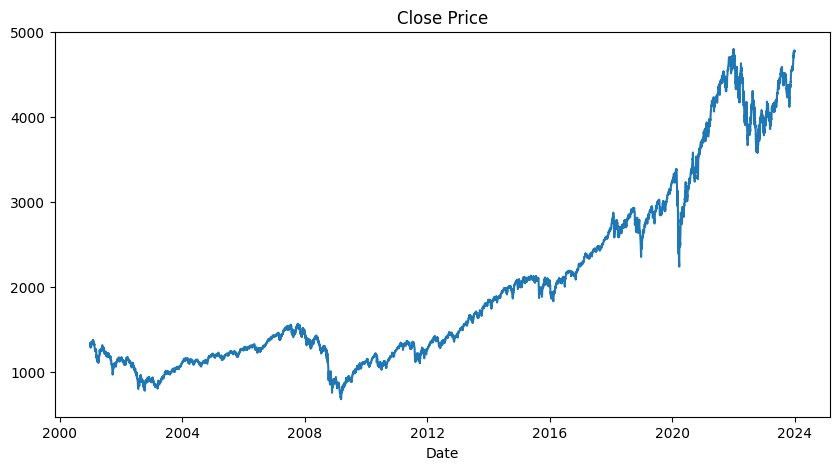

In [4]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.title('Close Price')
plt.plot(merged_data['Close'])
plt.xlabel('Date')

In [5]:
import numpy as np
import math

close = np.array(merged_data['Close']).reshape(-1, 1)
train_data_len = int(np.round(0.8 * close.shape[0]))
train_data_len


4631

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) #scale the data between 0 and 1
scaled_data = scaler.fit_transform(close) #fit and transform the data
scaled_data

array([[0.15501341],
       [0.15834594],
       [0.15963232],
       ...,
       [0.99636411],
       [0.99679372],
       [0.99351219]])

In [7]:
#create the training data set
train_data = scaled_data[0:train_data_len, :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()


[array([0.15501341, 0.15834594, 0.15963232, 0.15624886, 0.14726591,
       0.16287018, 0.15941873, 0.15092607, 0.15032171, 0.15152075,
       0.15454741, 0.15783621, 0.15582897, 0.15779497, 0.15847941,
       0.16296967, 0.16165174, 0.16173911, 0.16598665, 0.16693325,
       0.1652852 , 0.16466383, 0.1669017 , 0.16922206, 0.16734829,
       0.16915895, 0.16333375, 0.16450852, 0.16401094, 0.16125125,
       0.15922214, 0.15490906, 0.15868332, 0.15588965, 0.15519062,
       0.15778525, 0.15169792, 0.14621493, 0.14046985, 0.13987517,
       0.13818588, 0.14347468, 0.14111788, 0.13674898, 0.1370621 ,
       0.13535096, 0.1371058 , 0.14011306, 0.14207663, 0.14276837,
       0.13516649, 0.1222394 , 0.12648694, 0.11897484, 0.12063748,
       0.11504771, 0.11997001, 0.11312781, 0.10815698, 0.10705017])]
[0.11245061891863911]

[array([0.15501341, 0.15834594, 0.15963232, 0.15624886, 0.14726591,
       0.16287018, 0.15941873, 0.15092607, 0.15032171, 0.15152075,
       0.15454741, 0.15783621, 0.15

In [8]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape




(4571, 60)

In [9]:
#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(4571, 60, 1)

In [10]:
test_data = scaled_data[train_data_len - 60:, :]
x_test = []
y_test = close[train_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test= np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape





(1158, 60, 1)

this model is terrible

In [11]:

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
#NameError: name 'tf' is not defined
import tensorflow as tf
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(1, 1)))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(16, activation='linear'))
model.add(Dense(1, activation='linear'))
#change the number of epochs to 10, this is might be too many 
params = {
    'train_batch_size': 32,  # 训练批次大小
    'epochs': 250,  # 训练轮次
    'output_path': 'output/',  # 输出路径
    'learning_rate': 0.03,  # 初始学习率
    'lr_decay_rate': 0.8,  # 学习率衰减率
    'num_of_decay_per_epoch': 6  # 每个 epoch 中进行学习率衰减的次数
}

train_batch_size = params['train_batch_size']
epochs = params['epochs']
output_path = params['output_path']
learning_rate = params['learning_rate']
lr_decay_rate = params['lr_decay_rate']
num_of_decay_per_epoch = params['num_of_decay_per_epoch']
          

# Specifying the learning rate decay schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=learning_rate,
    decay_steps=math.floor(epochs / num_of_decay_per_epoch),
    decay_rate=lr_decay_rate
)

model.compile(
    loss='mean_squared_error',
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    metrics=['mean_squared_error']
)

model.summary()

          

KeyboardInterrupt: 

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
#NameError: name 'tf' is not defined
import tensorflow as tf
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
#get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

In [ ]:
#plot
train = merged_data[:train_data_len]
valid = merged_data[train_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()



In [ ]:
valid

In [ ]:
#get the quote
sp500_quote = yf.download('^GSPC', start='2021-01-01', end='2023-12-29')
new_df = sp500_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
x_test = []
x_test.append(last_60_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
pred_price

dont use close price as the target variable

In [1]:
import yfinance as yf
import pandas as pd
import pandas_datareader.data as pdr
import numpy as np

# Fetch daily S&P 500 data
sp500_data = yf.download('^GSPC', start='2000-01-01', end='2024-01-01')

#add tech indicators
import pandas as pd
import pandas_ta as ta
sp500_data['Rsi'] = ta.rsi(sp500_data['Close'], length=14)#length is the number of periods to calculate the RSI
sp500_data['Emaf']= ta.ema(sp500_data['Close'], length=20)
sp500_data['Emam'] = ta.ema(sp500_data['Close'], length=100)
sp500_data['Emas'] = ta.ema(sp500_data['Close'], length=200)

sp500_data['Daily_return'] = sp500_data['Adj Close']-sp500_data['Open']
sp500_data['Daily_return'] = sp500_data['Daily_return'].shift(-1)

sp500_data['Target_class'] = np.where(sp500_data['Daily_return'] > 0, 1, 0)

sp500_data.dropna(inplace=True)
sp500_data.drop(['Volume', 'Close'], axis=1, inplace=True)
sp500_data['Target_class'] = np.where(sp500_data['Daily_return'] > 0, 1, 0)#you can  predict this
sp500_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Adj Close,Rsi,Emaf,Emam,Emas,Daily_return,Target_class
Date,,,,,,,,,,
2000-10-16,1374.170044,1379.479980,1365.060059,1374.619995,36.818549,1412.670946,1450.789033,1444.783248,-24.650024,0
2000-10-17,1374.619995,1380.989990,1342.339966,1349.969971,32.525658,1406.699424,1448.792616,1443.839833,-7.839966,0
2000-10-18,1349.969971,1356.650024,1305.790039,1342.130005,31.276596,1400.549956,1446.680485,1442.827795,46.630005,1
2000-10-19,1342.130005,1389.930054,1342.130005,1388.760010,44.843750,1399.427104,1445.533545,1442.289807,8.170044,1
2000-10-20,1388.760010,1408.469971,1382.189941,1396.930054,46.824542,1399.189290,1444.571100,1441.838466,-1.150024,0


In [2]:

gdp = pdr.get_data_fred('GDP', start='2000-01-01', end='2024-01-01') #quaterly
inflation = pdr.get_data_fred('CPIAUCSL', start='2000-01-01', end='2024-01-01')  # CPI for inflation
unemployment = pdr.get_data_fred('UNRATE', start='2000-01-01', end='2024-01-01')
interest_rate = pdr.get_data_fred('FEDFUNDS', start='2000-01-01', end='2024-01-01')

# Rename columns for clarity
gdp.rename(columns={'GDP': 'GDP'}, inplace=True)
inflation.rename(columns={'CPIAUCSL': 'Inflation'}, inplace=True)
unemployment.rename(columns={'UNRATE': 'Unemployment'}, inplace=True)
interest_rate.rename(columns={'FEDFUNDS': 'Interest_Rate'}, inplace=True)
GDP = gdp.resample('D').ffill()
Inflation = inflation.resample('D').ffill()
Unemployment = unemployment.resample('D').ffill()
Interest_rate = interest_rate.resample('D').ffill()

merged_data = sp500_data.join([Inflation, Unemployment, Interest_rate, GDP], how='left')

merged_data.head()

,Open,High,Low,Adj Close,Rsi,Emaf,Emam,Emas,Daily_return,Target_class,Inflation,Unemployment,Interest_Rate,GDP
Date,,,,,,,,,,,,,,
2000-10-16,1374.170044,1379.479980,1365.060059,1374.619995,36.818549,1412.670946,1450.789033,1444.783248,-24.650024,0.0,173.9,3.9,6.51,10435.744
2000-10-17,1374.619995,1380.989990,1342.339966,1349.969971,32.525658,1406.699424,1448.792616,1443.839833,-7.839966,0.0,173.9,3.9,6.51,10435.744
2000-10-18,1349.969971,1356.650024,1305.790039,1342.130005,31.276596,1400.549956,1446.680485,1442.827795,46.630005,1.0,173.9,3.9,6.51,10435.744
2000-10-19,1342.130005,1389.930054,1342.130005,1388.760010,44.843750,1399.427104,1445.533545,1442.289807,8.170044,1.0,173.9,3.9,6.51,10435.744
2000-10-20,1388.760010,1408.469971,1382.189941,1396.930054,46.824542,1399.189290,1444.571100,1441.838466,-1.150024,0.0,173.9,3.9,6.51,10435.744


In [3]:
import numpy as np
import math

close = np.array(merged_data['Adj Close']).reshape(-1, 1)
train_data_len = int(np.round(0.8 * close.shape[0]))
train_data_len




4670

try to predict the daily return

close = np.array(merged_data['Daily_return']).reshape(-1, 1)
train_data_len = int(np.round(0.8 * close.shape[0]))
train_data_len


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) #scale the data between 0 and 1
scaled_data = scaler.fit_transform(close) #fit and transform the data
scaled_data
#create the training data set
train_data = scaled_data[0:train_data_len, :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape

#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape
test_data = scaled_data[train_data_len - 60:, :]
x_test = []
y_test = close[train_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test= np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

[array([0.16943808, 0.16345511, 0.16155221, 0.17287009, 0.1748531 ,
       0.17457397, 0.17514435, 0.16707888, 0.16696721, 0.17064194,
       0.175273  , 0.1827341 , 0.18074867, 0.18247195, 0.18207632,
       0.18341126, 0.18333361, 0.17785065, 0.17563221, 0.167341  ,
       0.16376822, 0.1714599 , 0.17312496, 0.16887982, 0.16776333,
       0.16167114, 0.16281919, 0.1567537 , 0.16146484, 0.16321239,
       0.1600862 , 0.16150368, 0.15495516, 0.15502313, 0.15738719,
       0.1699041 , 0.16381675, 0.16189688, 0.16829003, 0.17079243,
       0.16860315, 0.16588713, 0.16126097, 0.15427557, 0.15684593,
       0.15268577, 0.14276837, 0.14522466, 0.15277071, 0.15501341,
       0.15834594, 0.15963232, 0.15624886, 0.14726591, 0.16287018,
       0.15941873, 0.15092607, 0.15032171, 0.15152075, 0.15454741])]
[0.15783620807811588]

[array([0.16943808, 0.16345511, 0.16155221, 0.17287009, 0.1748531 ,
       0.17457397, 0.17514435, 0.16707888, 0.16696721, 0.17064194,
       0.175273  , 0.1827341 , 0.18

(1167, 60, 1)

In [18]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4610, 60, 1), (4610,), (1167, 60, 1), (1167, 1))

In [19]:

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import tensorflow as tf


model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(16, activation='linear'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=10,batch_size=10)

2024-08-01 19:35:43.698045: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-08-01 19:35:43.698078: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-08-01 19:35:43.698083: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-08-01 19:35:43.698100: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-01 19:35:43.698111: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When 

Epoch 1/10


2024-08-01 19:35:45.697524: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


KeyboardInterrupt: 

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
#get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse
#could be >70 ??

well, my dataset is too big, I decide to only use a subset of my data to train the model

In [20]:
#get a subset of x_train
x_train_subset = x_train[:500]
y_train_subset = y_train[:500]
y_test_subset = y_test[:500]
x_test_subset = x_test[:500]




In [25]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier, KerasRegressor
# Define the Keras model
# Define the Keras model
def model(optimizer='adam'):
    grid_model = Sequential()
    grid_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    grid_model.add(LSTM(50))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(16))
    grid_model.add(Dense(1))
    grid_model.compile(optimizer=optimizer, loss='mean_squared_error')
    return grid_model

# Wrap the Keras model with KerasRegressor
grid_model = KerasRegressor(build_fn=model, verbose=1)

# Define the grid search parameters
params = {
    'batch_size': [10, 20, 30],
    'epochs': [10, 50, 100],
    'optimizer': ['adam']
}

# Assuming x_train_subset, y_train_subset, x_test_subset, and y_test_subset are defined
# Perform grid search
grid_search = GridSearchCV(estimator=grid_model, param_grid=params, cv=2)
grid_search_results = grid_search.fit(x_train_subset, y_train_subset, validation_data=(x_test_subset, y_test_subset))

# Print the best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)



Epoch 1/10


/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 0.0030 - val_loss: 10833564.0000
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 3.2492e-04 - val_loss: 10832501.0000
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 1.4685e-04 - val_loss: 10830986.0000
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 9.9954e-05 - val_loss: 10831404.0000
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 8.4916e-05 - val_loss: 10831398.0000
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 1.0412e-04 - val_loss: 10831056.0000
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 8.7552e-05 - val_loss: 10831357.0000
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 8.5906e-05 - val_loss: 10831028.0000
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 7.3228e-05 - val_loss: 10831147.0000
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 7.4717e-05 - val_loss: 10831057.0000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Epoch 1/10


/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 0.0041 - val_loss: 10832981.0000
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 4.3237e-04 - val_loss: 10833113.0000
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 3.0806e-04 - val_loss: 10832842.0000
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 2.2163e-04 - val_loss: 10832564.0000
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 2.0178e-04 - val_loss: 10832246.0000
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 1.5336e-04 - val_loss: 10831946.0000
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 1.3137e-04 - val_loss: 10831622.0000
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 1.4122e-04 - val_loss: 10831593.0000
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 1.4360e-04 - val_loss: 10831514.0000
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 1.1444e-04 - val_loss: 10831395.0000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Epoch 1/50


/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0022 - val_loss: 10833117.0000
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 3.7947e-04 - val_loss: 10832350.0000
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 1.3728e-04 - val_loss: 10830818.0000
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 1.1024e-04 - val_loss: 10831191.0000
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 1.0260e-04 - val_loss: 10831292.0000
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 8.5190e-05 - val_loss: 10830967.0000
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 8.8196e-05 - val_loss: 10831139.0000
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 1.1832e-04 - val_loss: 10830876.0000
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 9.5703e-05 - val_loss: 10830965.0000
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 1.1121e-04 - val_loss: 10831157.0000
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - 

/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 0.0043 - val_loss: 10832912.0000
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 3.9815e-04 - val_loss: 10833028.0000
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 2.5726e-04 - val_loss: 10832890.0000
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 2.8835e-04 - val_loss: 10832553.0000
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 2.0729e-04 - val_loss: 10832177.0000
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 2.1088e-04 - val_loss: 10832005.0000
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 1.7664e-04 - val_loss: 10831674.0000
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 1.3543e-04 - val_loss: 10831717.0000
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 1.2859e-04 - val_loss: 10831512.0000
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 1.0519e-04 - val_loss: 10831460.0000
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - 

/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - loss: 0.0016 - val_loss: 10833148.0000
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 2.7572e-04 - val_loss: 10831900.0000
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 1.4388e-04 - val_loss: 10831144.0000
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 1.0088e-04 - val_loss: 10831314.0000
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 9.6722e-05 - val_loss: 10831562.0000
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 7.2423e-05 - val_loss: 10831134.0000
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 8.1915e-05 - val_loss: 10831190.0000
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 6.8253e-05 - val_loss: 10831182.0000
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 7.3755e-05 - val_loss: 10831008.0000
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 8.7833e-05 - val_loss: 10831350.0000
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5

/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 0.0035 - val_loss: 10832796.0000
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 3.0822e-04 - val_loss: 10832873.0000
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 2.6819e-04 - val_loss: 10832595.0000
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 1.9631e-04 - val_loss: 10832328.0000
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 1.9087e-04 - val_loss: 10831736.0000
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 1.6898e-04 - val_loss: 10831426.0000
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 1.3861e-04 - val_loss: 10831399.0000
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 1.2965e-04 - val_loss: 10831458.0000
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 1.3964e-04 - val_loss: 10831451.0000
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 8.8501e-05 - val_loss: 10831496.0000
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 60

/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 242ms/step - loss: 0.0023 - val_loss: 10833474.0000
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 5.4799e-04 - val_loss: 10832886.0000
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 2.5746e-04 - val_loss: 10832154.0000
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 1.6016e-04 - val_loss: 10831622.0000
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 1.1644e-04 - val_loss: 10831265.0000
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 1.0140e-04 - val_loss: 10831170.0000
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 8.3916e-05 - val_loss: 10831372.0000
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 1.2177e-04 - val_loss: 10831288.0000
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 9.2832e-05 - val_loss: 10831235.0000
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 8.4036e-05 - val_loss: 10831202.0000
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
Epoch 1/10


/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - loss: 0.0053 - val_loss: 10833284.0000
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 6.6718e-04 - val_loss: 10832919.0000
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 3.2930e-04 - val_loss: 10832906.0000
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 3.0152e-04 - val_loss: 10833013.0000
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 2.8661e-04 - val_loss: 10832876.0000
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 2.6599e-04 - val_loss: 10832695.0000
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 2.1484e-04 - val_loss: 10832585.0000
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 2.1599e-04 - val_loss: 10832408.0000
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 1.6914e-04 - val_loss: 10832291.0000
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 2.1158e-04 - val_loss: 10831993.0000
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
Epoch 1/50


/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 247ms/step - loss: 0.0025 - val_loss: 10833751.0000
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 6.8440e-04 - val_loss: 10832971.0000
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 3.4263e-04 - val_loss: 10832425.0000
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 2.6600e-04 - val_loss: 10831911.0000
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 1.3924e-04 - val_loss: 10831201.0000
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 1.1562e-04 - val_loss: 10831122.0000
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 8.7383e-05 - val_loss: 10831330.0000
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 1.0061e-04 - val_loss: 10831330.0000
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 9.1181e-05 - val_loss: 10831266.0000
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 8.2984e-05 - val_loss: 10831135.0000
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step -

/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - loss: 0.0059 - val_loss: 10833260.0000
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 8.0845e-04 - val_loss: 10832897.0000
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 4.7580e-04 - val_loss: 10833158.0000
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 2.3924e-04 - val_loss: 10833017.0000
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 2.6470e-04 - val_loss: 10832925.0000
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 2.5317e-04 - val_loss: 10832838.0000
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 2.2055e-04 - val_loss: 10832711.0000
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 2.2121e-04 - val_loss: 10832553.0000
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 1.7463e-04 - val_loss: 10832423.0000
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 1.9547e-04 - val_loss: 10832329.0000
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s

/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - loss: 0.0018 - val_loss: 10833447.0000
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 4.3739e-04 - val_loss: 10832908.0000
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 2.3137e-04 - val_loss: 10832086.0000
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 1.3818e-04 - val_loss: 10831289.0000
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 1.0542e-04 - val_loss: 10831031.0000
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 1.0031e-04 - val_loss: 10831441.0000
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 9.4905e-05 - val_loss: 10831330.0000
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 8.7405e-05 - val_loss: 10831247.0000
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 9.7246e-05 - val_loss: 10831058.0000
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 7.8720e-05 - val_loss: 10831216.0000
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 5

/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 166ms/step - loss: 0.0048 - val_loss: 10833330.0000
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 5.9235e-04 - val_loss: 10832952.0000
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 3.0056e-04 - val_loss: 10832936.0000
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 3.3007e-04 - val_loss: 10833021.0000
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 2.7177e-04 - val_loss: 10832859.0000
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 2.2746e-04 - val_loss: 10832603.0000
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 2.4958e-04 - val_loss: 10832481.0000
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 2.0502e-04 - val_loss: 10832290.0000
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 1.7679e-04 - val_loss: 10832069.0000
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 1.6903e-04 - val_loss: 10831824.0000
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 6

/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 201ms/step - loss: 0.0031 - val_loss: 10833297.0000
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 4.7889e-04 - val_loss: 10833423.0000
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 3.7940e-04 - val_loss: 10833028.0000
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 3.1431e-04 - val_loss: 10832665.0000
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 1.9171e-04 - val_loss: 10831964.0000
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 1.2895e-04 - val_loss: 10831137.0000
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 1.0171e-04 - val_loss: 10831082.0000
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 7.8507e-05 - val_loss: 10831307.0000
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 8.9797e-05 - val_loss: 10831375.0000
Epoch 10/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 9.2782e-05 - val_loss: 10831305.0000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
Epoch 1/10


/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 395ms/step - loss: 0.0087 - val_loss: 10832439.0000
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 7.5768e-04 - val_loss: 10833289.0000
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 6.0744e-04 - val_loss: 10832824.0000
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 5.0406e-04 - val_loss: 10833050.0000
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 3.4256e-04 - val_loss: 10832999.0000
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 2.7790e-04 - val_loss: 10832858.0000
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 2.4635e-04 - val_loss: 10832890.0000
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 2.6956e-04 - val_loss: 10832712.0000
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 2.2525e-04 - val_loss: 10832708.0000
Epoch 10/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 2.2104e-04 - val_loss: 10832558.0000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step
Epoch 1/50


/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 218ms/step - loss: 0.0027 - val_loss: 10833226.0000
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 3.8919e-04 - val_loss: 10833275.0000
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 3.0899e-04 - val_loss: 10832914.0000
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 2.6239e-04 - val_loss: 10832500.0000
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 1.7961e-04 - val_loss: 10831958.0000
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 1.5006e-04 - val_loss: 10831341.0000
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 190ms/step - loss: 9.3681e-05 - val_loss: 10831163.0000
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 1.0644e-04 - val_loss: 10831085.0000
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 1.1200e-04 - val_loss: 10831234.0000
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 1.2500e-04 - val_loss: 10831375.0000
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 9.6053e-05 - 

/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 192ms/step - loss: 0.0061 - val_loss: 10832685.0000
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 6.2983e-04 - val_loss: 10832996.0000
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 3.9428e-04 - val_loss: 10832769.0000
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 2.2060e-04 - val_loss: 10832974.0000
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 2.5678e-04 - val_loss: 10832759.0000
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 2.5371e-04 - val_loss: 10832788.0000
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 2.2554e-04 - val_loss: 10832648.0000
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 2.3049e-04 - val_loss: 10832530.0000
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 2.1045e-04 - val_loss: 10832548.0000
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 1.8589e-04 - val_loss: 10832282.0000
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 2.3359e-04 - v

/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 172ms/step - loss: 0.0041 - val_loss: 10833491.0000
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 6.6276e-04 - val_loss: 10833730.0000
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 4.6872e-04 - val_loss: 10833265.0000
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 3.3601e-04 - val_loss: 10833074.0000
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 2.5327e-04 - val_loss: 10832444.0000
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 1.4543e-04 - val_loss: 10831753.0000
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 9.8687e-05 - val_loss: 10831279.0000
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 1.0923e-04 - val_loss: 10831464.0000
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 8.9912e-05 - val_loss: 10831603.0000
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 1.0667e-04 - val_loss: 10831523.0000
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 1.076

/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 194ms/step - loss: 0.0097 - val_loss: 10832450.0000
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 9.7594e-04 - val_loss: 10833362.0000
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 6.9821e-04 - val_loss: 10832931.0000
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 4.6136e-04 - val_loss: 10833111.0000
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 3.1310e-04 - val_loss: 10833066.0000
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 3.0621e-04 - val_loss: 10832923.0000
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 2.1142e-04 - val_loss: 10832935.0000
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 2.4496e-04 - val_loss: 10832790.0000
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 2.6609e-04 - val_loss: 10832717.0000
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 2.2193e-04 - val_loss: 10832582.0000
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 1.

/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - loss: 0.0026 - val_loss: 10832214.0000
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 2.5391e-04 - val_loss: 10831525.0000
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 1.3235e-04 - val_loss: 10831311.0000
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 1.0186e-04 - val_loss: 10831051.0000
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 1.2735e-04 - val_loss: 10831400.0000
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 1.1112e-04 - val_loss: 10831212.0000
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 9.6886e-05 - val_loss: 10831063.0000
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 9.9976e-05 - val_loss: 10830901.0000
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 8.0959e-05 - val_loss: 10831201.0000
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 9.1608e-05 - val_loss: 10831273.0000
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - 

In [31]:
print("Best parameters found: ", grid_search.best_params_)


Best parameters found:  {'batch_size': 10, 'epochs': 50, 'optimizer': 'adam'}


In [32]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(16))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50, batch_size=10)

/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - loss: 0.0028
Epoch 2/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - loss: 2.7336e-04
Epoch 3/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - loss: 2.1303e-04
Epoch 4/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - loss: 1.7999e-04
Epoch 5/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - loss: 1.8560e-04
Epoch 6/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - loss: 1.8131e-04
Epoch 7/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - loss: 1.8764e-04
Epoch 8/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - loss: 1.7854e-04
Epoch 9/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - loss: 1.8321e-04
Epoch 10/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - loss: 1.6057e-04
Epoch 11/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - loss: 1.4689e-04
Epoch 12/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - loss: 1.7856e-04
Epoch 13/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - loss: 1.7172e-04
Epoch 14/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/s

In [33]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
#get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse
#this is the best model so far

37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step


54.92707944699371

/var/folders/py/r18r2psx509b19yt58bj8b300000gn/T/ipykernel_17657/3029263538.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


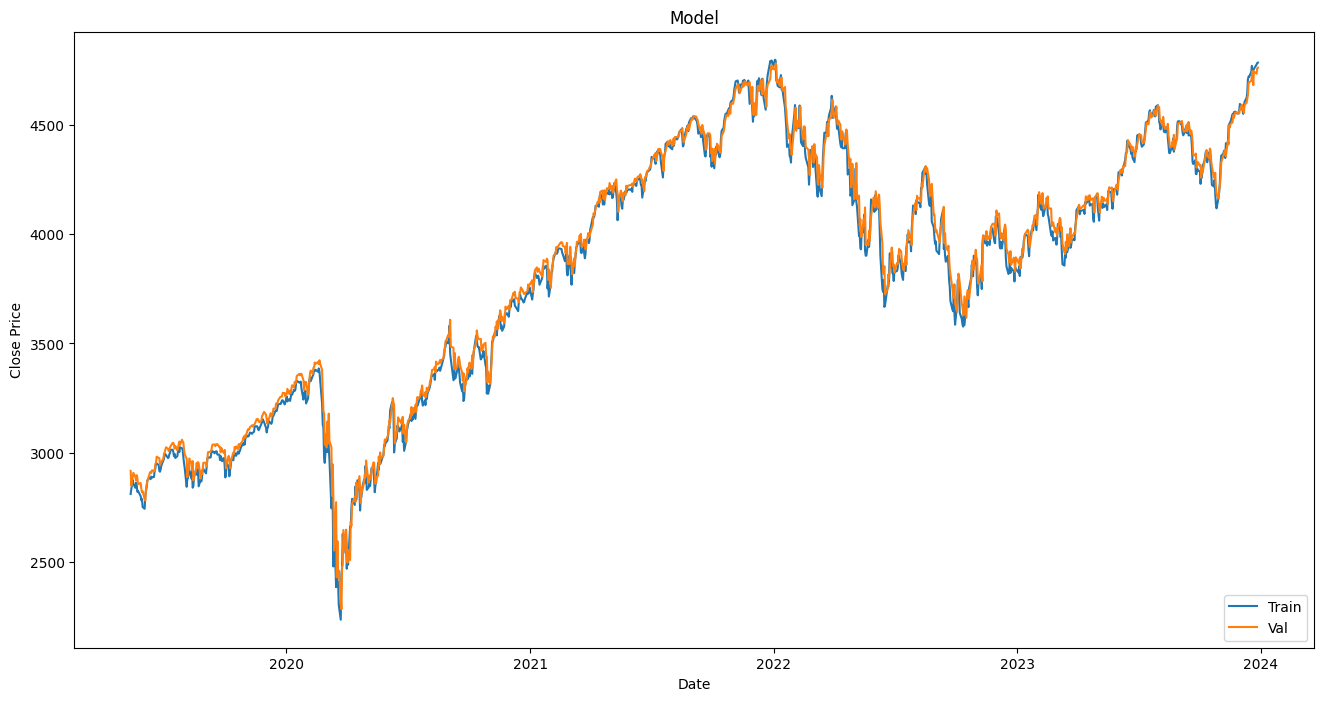

In [34]:
#plot
valid = merged_data[train_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

Hyperparameter tuning
Examples of hyperparameters include the number of neurons in each layer, the number of layers, the learning rate, and the dropout rate.
There are two main techniques for hyperparameter tuning: grid search and random search.

Grid search involves specifying a range of values for each hyperparameter and then training and evaluating the model for each combination of hyperparameter values. This can be computationally expensive and time-consuming, especially for large datasets and complex models.

Random search is similar to grid search, but instead of trying all possible combinations of hyperparameter values, it samples random combinations of values. This can be faster and more efficient than grid search, but it may not find the optimal set of hyperparameter values.

I tried the Grid search, but it was too slow, and I didn't get any good results. I will try the Random search now. (dont have the computational power to do this, as my dataset is quite big 

In [46]:
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasRegressor
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

# Define the Keras model
def model(neurons=50, dropout_rate=0.2, optimizer='adam'):
    model = Sequential()
    model.add(LSTM(units=neurons, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(neurons))
    model.add(Dropout(dropout_rate))
    model.add(Dense(16))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Wrap the Keras model with KerasRegressor
regressor = KerasRegressor(
    model=model,
    verbose=1,
    neurons=50,  # Default value, will be overwritten by RandomizedSearchCV
    dropout_rate=0.2  # Default value, will be overwritten by RandomizedSearchCV
)

# Define the hyperparameter search space
param_grid = {
    'model__neurons': [1, 5, 10, 50, 100],
    'model__dropout_rate': [0.0, 0.01, 0.1, 0.2, 0.3],
    'batch_size': [10, 20, 30],
    'epochs': [10, 50, 100]
}

# Assuming x_train_subset, y_train_subset, x_test_subset, and y_test_subset are defined
# Perform random search
random_search = RandomizedSearchCV(estimator=regressor, param_distributions=param_grid, n_iter=10, cv=2, random_state=42)
random_search_results = random_search.fit(x_train_subset, y_train_subset, validation_data=(x_test_subset, y_test_subset))

# Print the best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)


Epoch 1/10


/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - loss: 0.0018 - val_loss: 10832873.0000
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 1.8745e-04 - val_loss: 10830970.0000
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 6.9413e-05 - val_loss: 10831348.0000
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 6.0482e-05 - val_loss: 10831272.0000
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 5.2092e-05 - val_loss: 10831264.0000
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 6.4725e-05 - val_loss: 10831131.0000
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 5.6948e-05 - val_loss: 10831313.0000
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 6.5546e-05 - val_loss: 10830778.0000
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 5.6693e-05 - val_loss: 10831139.0000
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 5.8062e-05 - val_loss: 10831249.0000
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Epoch 1/10


/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 144ms/step - loss: 0.0035 - val_loss: 10832927.0000
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 2.3686e-04 - val_loss: 10832656.0000
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 1.2796e-04 - val_loss: 10832322.0000
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 8.5943e-05 - val_loss: 10831862.0000
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - loss: 8.2055e-05 - val_loss: 10831395.0000
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 9.7584e-05 - val_loss: 10831510.0000
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 9.5928e-05 - val_loss: 10831453.0000
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 6.7796e-05 - val_loss: 10831257.0000
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 8.8439e-05 - val_loss: 10831302.0000
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 7.6059e-05 - val_loss: 10831314.0000
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Epoch 1/50


/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 224ms/step - loss: 0.0029 - val_loss: 10833648.0000
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 6.3181e-04 - val_loss: 10832909.0000
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 2.9449e-04 - val_loss: 10832729.0000
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 1.6969e-04 - val_loss: 10832068.0000
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 1.0348e-04 - val_loss: 10831225.0000
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 7.0096e-05 - val_loss: 10830794.0000
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 8.4902e-05 - val_loss: 10831073.0000
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 5.7937e-05 - val_loss: 10831358.0000
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 5.9141e-05 - val_loss: 10831304.0000
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 5.6317e-05 - val_loss: 10831129.0000
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 5.1780e-05 - va

/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 232ms/step - loss: 0.0065 - val_loss: 10833144.0000
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 0.0010 - val_loss: 10832442.0000
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 4.7473e-04 - val_loss: 10832997.0000
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 2.8810e-04 - val_loss: 10832707.0000
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 2.0013e-04 - val_loss: 10832822.0000
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 1.8575e-04 - val_loss: 10832647.0000
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 1.4102e-04 - val_loss: 10832589.0000
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 1.1617e-04 - val_loss: 10832443.0000
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 1.2722e-04 - val_loss: 10832360.0000
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 1.1044e-04 - val_loss: 10832200.0000
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 9.2442e-05 - val_lo

/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - loss: 0.0023 - val_loss: 10833781.0000
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 8.2765e-04 - val_loss: 10833978.0000
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 6.6119e-04 - val_loss: 10833961.0000
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 4.6297e-04 - val_loss: 10833933.0000
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 4.0472e-04 - val_loss: 10833861.0000
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 3.4744e-04 - val_loss: 10833785.0000
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 3.2510e-04 - val_loss: 10833701.0000
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 3.1681e-04 - val_loss: 10833623.0000
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 2.9369e-04 - val_loss: 10833543.0000
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 2.8678e-04 - val_loss: 10833483.0000
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step -

/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - loss: 0.0114 - val_loss: 10834570.0000
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 9.5975e-04 - val_loss: 10834212.0000
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 7.4406e-04 - val_loss: 10834265.0000
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 4.9822e-04 - val_loss: 10834364.0000
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 4.9160e-04 - val_loss: 10834332.0000
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 3.6428e-04 - val_loss: 10834309.0000
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 4.3686e-04 - val_loss: 10834317.0000
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 3.9884e-04 - val_loss: 10834316.0000
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 4.1197e-04 - val_loss: 10834314.0000
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 4.4160e-04 - val_loss: 10834300.0000
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step -

/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 338ms/step - loss: 0.0075 - val_loss: 10835174.0000
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0011 - val_loss: 10834664.0000
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0013 - val_loss: 10834608.0000
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 7.7245e-04 - val_loss: 10834642.0000
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 7.5260e-04 - val_loss: 10834568.0000
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 6.6906e-04 - val_loss: 10834419.0000
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 6.2697e-04 - val_loss: 10834246.0000
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 5.5308e-04 - val_loss: 10834061.0000
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 4.5925e-04 - val_loss: 10833811.0000
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 3.3794e-04 - val_loss: 10833396.0000
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 2

/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 432ms/step - loss: 0.0107 - val_loss: 10833994.0000
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 7.0932e-04 - val_loss: 10833547.0000
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0011 - val_loss: 10833886.0000
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 4.0619e-04 - val_loss: 10833979.0000
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 4.3226e-04 - val_loss: 10833818.0000
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 3.2701e-04 - val_loss: 10833766.0000
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 3.0626e-04 - val_loss: 10833816.0000
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 3.4013e-04 - val_loss: 10833773.0000
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 3.0505e-04 - val_loss: 10833707.0000
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 3.0141e-04 - val_loss: 10833695.0000
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 2.4965e-0

/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 171ms/step - loss: 0.0020 - val_loss: 10833413.0000
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 5.1436e-04 - val_loss: 10832825.0000
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 2.7196e-04 - val_loss: 10832011.0000
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 1.5761e-04 - val_loss: 10831343.0000
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 1.3030e-04 - val_loss: 10831267.0000
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 9.5137e-05 - val_loss: 10831330.0000
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 1.2684e-04 - val_loss: 10831292.0000
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 7.9280e-05 - val_loss: 10831164.0000
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 9.7279e-05 - val_loss: 10831292.0000
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 9.4764e-05 - val_loss: 10831378.0000
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 5

/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 183ms/step - loss: 0.0074 - val_loss: 10833602.0000
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 9.9234e-04 - val_loss: 10833092.0000
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 5.3942e-04 - val_loss: 10833420.0000
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 3.5795e-04 - val_loss: 10833195.0000
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 2.9857e-04 - val_loss: 10833193.0000
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 2.8579e-04 - val_loss: 10833055.0000
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 2.7112e-04 - val_loss: 10832841.0000
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 3.0631e-04 - val_loss: 10832728.0000
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 2.5748e-04 - val_loss: 10832645.0000
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 2.2925e-04 - val_loss: 10832447.0000
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 4

/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 241ms/step - loss: 0.0030 - val_loss: 10833511.0000
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 6.3006e-04 - val_loss: 10832821.0000
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 2.7272e-04 - val_loss: 10832603.0000
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 1.7310e-04 - val_loss: 10832078.0000
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 1.3996e-04 - val_loss: 10831373.0000
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 8.1012e-05 - val_loss: 10831110.0000
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 8.3140e-05 - val_loss: 10831254.0000
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 7.4834e-05 - val_loss: 10831396.0000
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 7.0395e-05 - val_loss: 10831367.0000
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 6.0794e-05 - val_loss: 10831331.0000
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 6.759

/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 255ms/step - loss: 0.0070 - val_loss: 10833347.0000
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 0.0011 - val_loss: 10832642.0000
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 4.4797e-04 - val_loss: 10833154.0000
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 3.2798e-04 - val_loss: 10832841.0000
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 2.5632e-04 - val_loss: 10832924.0000
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 1.6846e-04 - val_loss: 10832756.0000
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 1.5933e-04 - val_loss: 10832658.0000
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 1.6070e-04 - val_loss: 10832519.0000
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 1.3505e-04 - val_loss: 10832370.0000
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 1.1340e-04 - val_loss: 10832211.0000
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 1.1578e-0

/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 243ms/step - loss: 0.0029 - val_loss: 10833781.0000
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 9.6391e-04 - val_loss: 10833855.0000
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 4.7531e-04 - val_loss: 10833963.0000
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 5.0690e-04 - val_loss: 10833749.0000
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 4.2907e-04 - val_loss: 10833630.0000
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 3.1710e-04 - val_loss: 10833488.0000
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 3.2715e-04 - val_loss: 10833183.0000
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 2.2892e-04 - val_loss: 10832800.0000
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 1.8193e-04 - val_loss: 10832330.0000
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 1.1133e-04 - val_loss: 10831725.0000
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 6.9288e-05 - va

/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 240ms/step - loss: 0.0096 - val_loss: 10833627.0000
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 6.8858e-04 - val_loss: 10833233.0000
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 9.1389e-04 - val_loss: 10833622.0000
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 3.8725e-04 - val_loss: 10833654.0000
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 3.4727e-04 - val_loss: 10833475.0000
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 2.7809e-04 - val_loss: 10833470.0000
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 2.3461e-04 - val_loss: 10833505.0000
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 2.6198e-04 - val_loss: 10833448.0000
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 2.5212e-04 - val_loss: 10833380.0000
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 2.2109e-04 - val_loss: 10833386.0000
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 2.1225e-04 - va

/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 251ms/step - loss: 0.0020 - val_loss: 10833802.0000
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 6.4650e-04 - val_loss: 10833886.0000
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 5.5390e-04 - val_loss: 10833707.0000
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 4.1775e-04 - val_loss: 10833524.0000
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 3.3905e-04 - val_loss: 10833284.0000
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 3.4364e-04 - val_loss: 10832945.0000
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 2.2239e-04 - val_loss: 10832617.0000
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 1.5456e-04 - val_loss: 10832331.0000
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 1.5120e-04 - val_loss: 10832120.0000
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 1.5667e-04 - val_loss: 10832014.0000
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
E

/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 176ms/step - loss: 0.0084 - val_loss: 10833653.0000
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 8.7705e-04 - val_loss: 10833588.0000
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 4.7003e-04 - val_loss: 10833829.0000
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 4.6170e-04 - val_loss: 10833696.0000
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 3.5936e-04 - val_loss: 10833700.0000
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 3.4024e-04 - val_loss: 10833696.0000
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 2.8817e-04 - val_loss: 10833651.0000
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 3.7396e-04 - val_loss: 10833648.0000
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 3.3880e-04 - val_loss: 10833603.0000
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 2.7679e-04 - val_loss: 10833596.0000
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step
Epoch 1/50


/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 271ms/step - loss: 0.0025 - val_loss: 10833357.0000
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - loss: 5.0312e-04 - val_loss: 10833125.0000
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 3.2145e-04 - val_loss: 10832874.0000
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 1.9470e-04 - val_loss: 10832366.0000
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 1.2318e-04 - val_loss: 10831918.0000
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 8.1679e-05 - val_loss: 10831227.0000
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 6.8887e-05 - val_loss: 10830991.0000
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 8.9827e-05 - val_loss: 10831206.0000
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 6.9031e-05 - val_loss: 10831304.0000
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 6.3929e-05 - val_loss: 10831284.0000
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 6.9477e-05 - v

/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 294ms/step - loss: 0.0074 - val_loss: 10832755.0000
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 5.7744e-04 - val_loss: 10833475.0000
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 4.3254e-04 - val_loss: 10833013.0000
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 3.1999e-04 - val_loss: 10833282.0000
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 2.5090e-04 - val_loss: 10833106.0000
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 2.1636e-04 - val_loss: 10833048.0000
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 1.9631e-04 - val_loss: 10832988.0000
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 1.6679e-04 - val_loss: 10832860.0000
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 1.6472e-04 - val_loss: 10832758.0000
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 1.3032e-04 - val_loss: 10832644.0000
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 1.2295e-04 - v

/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 246ms/step - loss: 0.0070 - val_loss: 10834911.0000
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0011 - val_loss: 10834615.0000
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0012 - val_loss: 10834576.0000
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0011 - val_loss: 10834664.0000
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 7.8019e-04 - val_loss: 10834716.0000
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 8.1507e-04 - val_loss: 10834680.0000
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 6.9655e-04 - val_loss: 10834637.0000
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 7.4154e-04 - val_loss: 10834622.0000
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 6.8825e-04 - val_loss: 10834625.0000
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 6.5571e-04 - val_loss: 10834615.0000
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 5.9904e-04 - val_loss: 108

/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 215ms/step - loss: 0.0123 - val_loss: 10834696.0000
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.0026 - val_loss: 10834328.0000
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 4.7318e-04 - val_loss: 10834152.0000
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 8.6823e-04 - val_loss: 10834206.0000
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 5.6727e-04 - val_loss: 10834314.0000
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 4.0423e-04 - val_loss: 10834348.0000
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 4.1773e-04 - val_loss: 10834315.0000
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 4.1772e-04 - val_loss: 10834282.0000
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 4.0769e-04 - val_loss: 10834279.0000
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 4.0142e-04 - val_loss: 10834302.0000
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 4.3210e-04 - val_lo

/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 183ms/step - loss: 0.0029 - val_loss: 10832335.0000
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 4.1242e-04 - val_loss: 10831839.0000
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 1.3313e-04 - val_loss: 10831105.0000
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 7.4704e-05 - val_loss: 10831104.0000
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 8.5510e-05 - val_loss: 10831143.0000
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 8.6279e-05 - val_loss: 10831161.0000
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 7.5313e-05 - val_loss: 10831073.0000
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 7.8431e-05 - val_loss: 10831137.0000
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 8.4557e-05 - val_loss: 10831011.0000
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 6.7413e-05 - val_loss: 10831021.0000
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 6

In [ ]:
def model(neurons=50, dropout_rate=0.2, optimizer='adam'):
    model = Sequential()
    model.add(LSTM(units=neurons, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(neurons))
    model.add(Dropout(dropout_rate))
    model.add(Dense(16))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

In [47]:
#get the best model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(100))
model.add(Dropout(0.1))
model.add(Dense(16))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=100, batch_size=30)

/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - loss: 0.0045
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 1.7301e-04
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 1.3610e-04
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 1.5590e-04
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 1.1476e-04
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 9.7311e-05
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - loss: 1.0759e-04
Epoch 8/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 8.9239e-05
Epoch 9/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 8.2038e-05
Epoch 10/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 7.7258e-05
Epoch 11/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 8.7060e-05
Epoch 12/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 6.6319e-05
Epoch 13/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 7.3824e-05
Epoch 14/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms

In [48]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
#get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse
#BETTER THAN THE PREVIOUS MODEL

37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step


47.39422413498602

now try daily return as the target variable


In [3]:
merged_data.head()

,Open,High,Low,Adj Close,Rsi,Emaf,Emam,Emas,Daily_return,Target_class,Inflation,Unemployment,Interest_Rate,GDP
Date,,,,,,,,,,,,,,
2000-10-16,1374.170044,1379.479980,1365.060059,1374.619995,36.818549,1412.670946,1450.789033,1444.783248,-24.650024,0.0,173.9,3.9,6.51,10435.744
2000-10-17,1374.619995,1380.989990,1342.339966,1349.969971,32.525658,1406.699424,1448.792616,1443.839833,-7.839966,0.0,173.9,3.9,6.51,10435.744
2000-10-18,1349.969971,1356.650024,1305.790039,1342.130005,31.276596,1400.549956,1446.680485,1442.827795,46.630005,1.0,173.9,3.9,6.51,10435.744
2000-10-19,1342.130005,1389.930054,1342.130005,1388.760010,44.843750,1399.427104,1445.533545,1442.289807,8.170044,1.0,173.9,3.9,6.51,10435.744
2000-10-20,1388.760010,1408.469971,1382.189941,1396.930054,46.824542,1399.189290,1444.571100,1441.838466,-1.150024,0.0,173.9,3.9,6.51,10435.744


In [4]:
import numpy as np
import math

close = np.array(merged_data['Daily_return']).reshape(-1, 1)
train_data_len = int(np.round(0.8 * close.shape[0]))
train_data_len

4670

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) #scale the data between 0 and 1
scaled_data = scaler.fit_transform(close) #fit and transform the data


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) #scale the data between 0 and 1
scaled_data = scaler.fit_transform(close) #fit and transform the data
scaled_data
#create the training data set
train_data = scaled_data[0:train_data_len, :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape

#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape
test_data = scaled_data[train_data_len - 60:, :]
x_test = []
y_test = close[train_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test= np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape


[array([0.41890241, 0.4749808 , 0.65669273, 0.52839022, 0.49729846,
       0.50897446, 0.39027966, 0.4996001 , 0.55164206, 0.56478612,
       0.60368361, 0.47384627, 0.52482047, 0.49569724, 0.5125772 ,
       0.5000676 , 0.42577477, 0.47064383, 0.387177  , 0.45202909,
       0.60685265, 0.52402027, 0.44278789, 0.48578941, 0.41740137,
       0.51691417, 0.41776828, 0.56588685, 0.52515399, 0.45816722,
       0.52061749, 0.41119605, 0.50206912, 0.53379412, 0.67317279,
       0.41746775, 0.47474746, 0.58900512, 0.53552891, 0.47104454,
       0.46380487, 0.43755095, 0.40512471, 0.53646309, 0.44322199,
       0.36482595, 0.53489527, 0.60485113, 0.53189278, 0.54693859,
       0.51881551, 0.45463127, 0.37766947, 0.71560664, 0.45369668,
       0.38440826, 0.49282833, 0.517615  , 0.54273479, 0.54633752])]
[0.4735465464315936]

[array([0.41890241, 0.4749808 , 0.65669273, 0.52839022, 0.49729846,
       0.50897446, 0.39027966, 0.4996001 , 0.55164206, 0.56478612,
       0.60368361, 0.47384627, 0.524

(1167, 60, 1)

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(100))
model.add(Dropout(0.1))
model.add(Dense(16))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=100, batch_size=30)

2024-08-01 21:42:25.212390: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-08-01 21:42:25.212418: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-08-01 21:42:25.212423: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-08-01 21:42:25.212444: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-01 21:42:25.212465: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When 

Epoch 1/100


2024-08-01 21:42:26.608733: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


154/154 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - loss: 0.0224
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0032
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0027
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0030
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0028
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0028
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0027
Epoch 8/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0027
Epoch 9/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0027
Epoch 10/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0026
Epoch 11/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0026
Epoch 12/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0027
Epoch 13/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0026
Epoch 14/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0026
Epoch 15/100
154/154 ━━━━━━━━━━━━━━━━━━━

In [29]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
#get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


36.776766477703724

/var/folders/py/r18r2psx509b19yt58bj8b300000gn/T/ipykernel_23026/4191362673.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


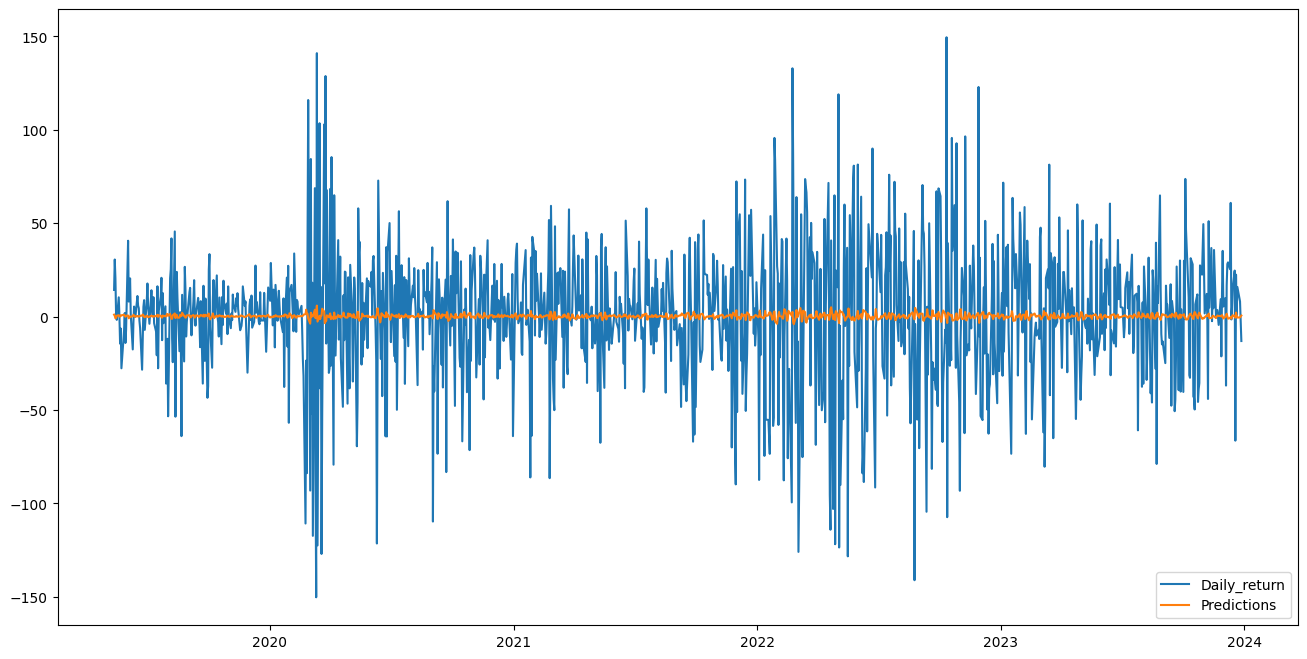

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plot for "Daily_return"


#plot
train = merged_data[:train_data_len]
valid = merged_data[train_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.plot(valid['Daily_return'])
plt.plot(valid['Predictions'])
plt.legend(['Daily_return', 'Predictions'], loc='lower right')
plt.show()

the predicted value are very different from the actual value.
So I wanted to see if at least the predicted value is in the same direction as the actual value, see above plot, unfortunately, it is not.

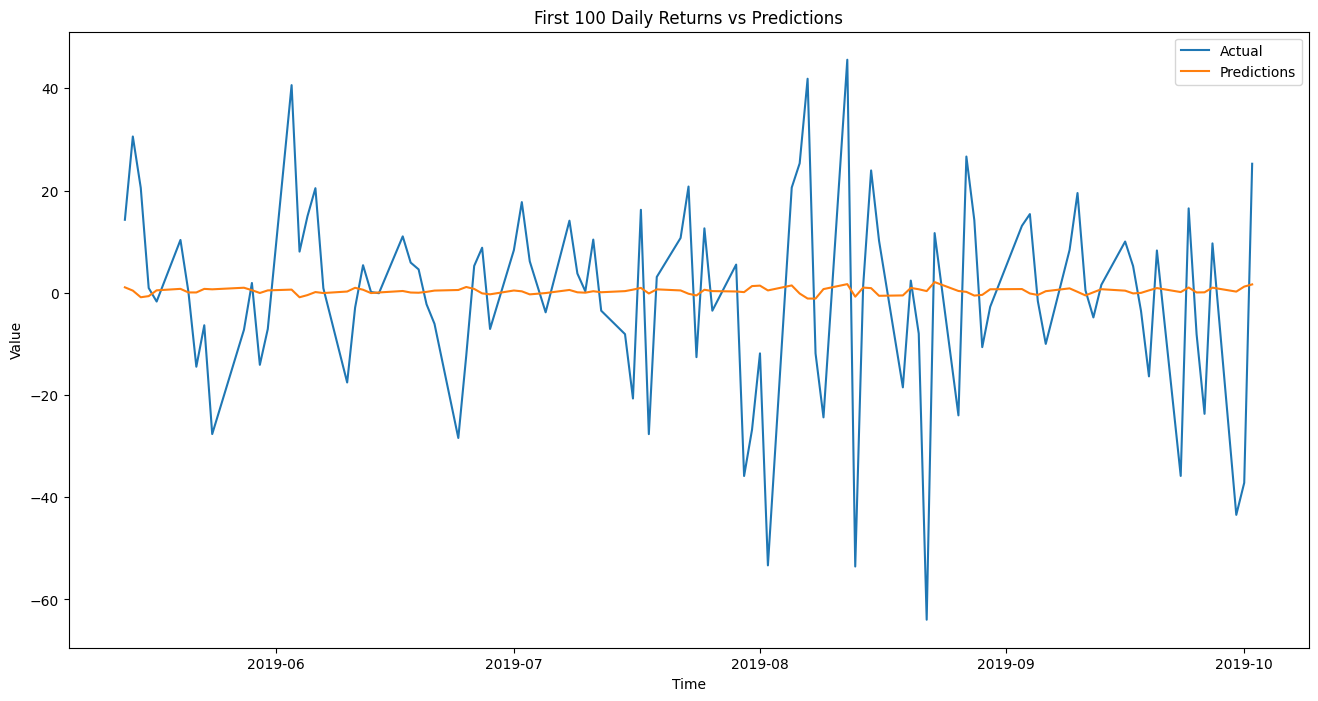

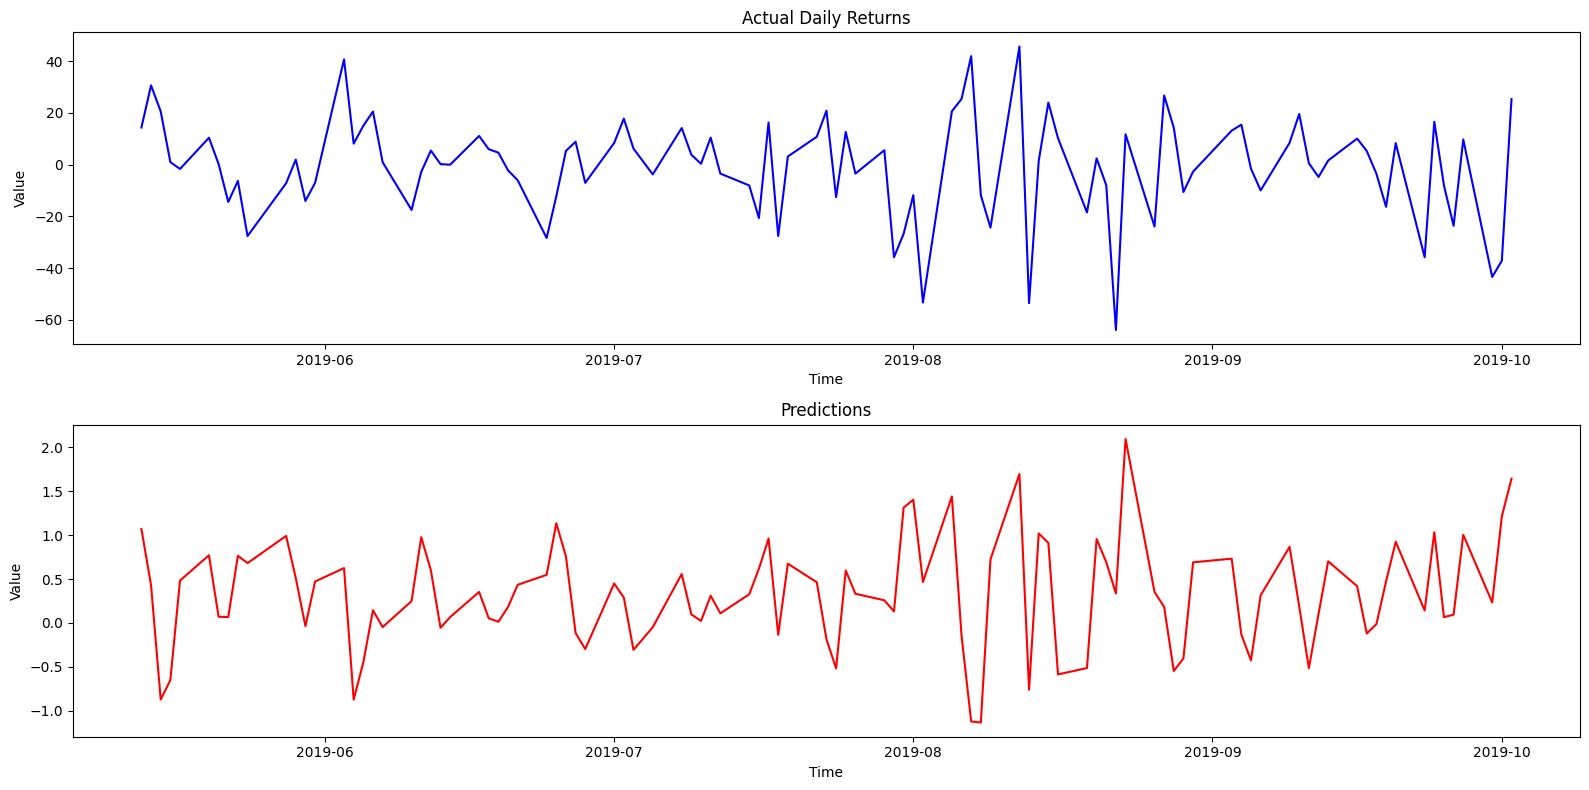

In [28]:

# Create the main plot
plt.figure(figsize=(16, 8))
plt.plot(valid['Daily_return'][:100], label='Actual')
plt.plot(valid['Predictions'][:100], label='Predictions')
plt.title('First 100 Daily Returns vs Predictions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Create subplots for detailed visualization
fig, axs = plt.subplots(2, figsize=(16, 8))

# Plotting the actual daily returns
axs[0].plot(valid['Daily_return'][:100], color='blue')
axs[0].set_title('Actual Daily Returns')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Value')

# Plotting the predictions
axs[1].plot(valid['Predictions'][:100], color='red')
axs[1].set_title('Predictions')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Value')

plt.tight_layout()
plt.show()
